In [101]:
from abc import ABC, abstractmethod
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

In [102]:
class IEstimator(ABC):
    @abstractmethod
    def fit(self, X, y):
        raise NotImplementedError("NOT IMPLEMENTED")

    @abstractmethod
    def predict(self, X):
        raise NotImplementedError("NOT IMPLEMENTED")

In [103]:
class KNN(IEstimator):
    def __init__(self, k_neighbors=3):
        self.k_neighbors = k_neighbors
    
    def fit(self, X, y):
        self.X = X
        self.y = y

    def _euclidian_metric(self, x1, x2):
        assert len(x1) == len(x2)
        return np.sqrt(np.sum((x1-x2)**2))

    def _predict(self, x):
        distances = [self._euclidian_metric(x,x_) for x_ in self.X]

        ids = np.argsort(distances)[:self.k_neighbors]
        labels = [self.y[id] for id in ids]
        
        # vote
        return Counter(labels).most_common(1)[0][0]


    def predict(self, X):
        return [self._predict(x) for x in X]

In [104]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder

iris = load_iris()
X = iris.data
y = iris.target

le = LabelEncoder()
y = le.fit_transform(y)

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [106]:
knn = KNN(k_neighbors=3)

knn.fit(X_train, y_train)

In [107]:
knn_preds = knn.predict(X_test)

<Axes: >

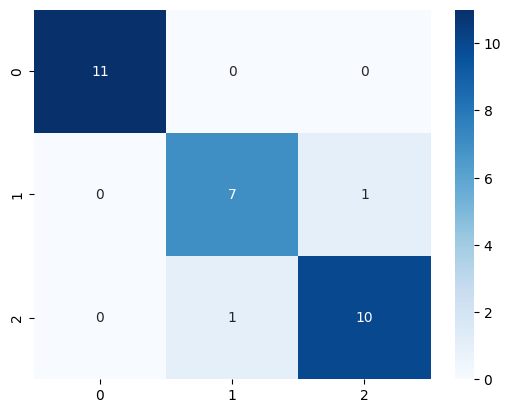

In [108]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap


heatmap(confusion_matrix(y_test, knn_preds), annot=True, fmt='d', cmap='Blues')

In [109]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, knn_preds))

0.9333333333333333


In [110]:
def plot_data_and_predictions(X, y, knn_preds):
    # Create a scatter plot of the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    
    # Create a scatter plot of the predicted points
    plt.scatter(X[:, 0], X[:, 1], c=knn_preds, cmap='viridis', marker='x')
    
    # Set labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Data and Predictions')
    
    # Show the plot
    plt.show()

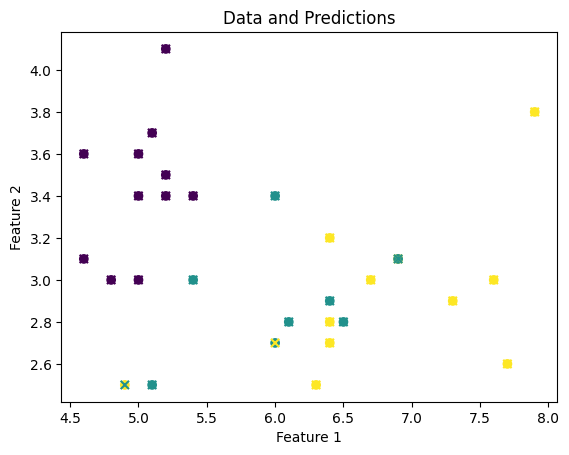

In [111]:
plot_data_and_predictions(X_test, y_test, knn_preds)